<a href="https://colab.research.google.com/github/Dashcloud-ML/ml_projects/blob/main/Flight_Fare_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/MeshalAlamr/flight-price-prediction/main/data/NYC_SVO.csv"
df = pd.read_csv(url)


In [3]:
# Data Preprocessing
# Convert 'Duration' column to minutes
df['Duration_Minutes'] = df['Duration'].str.split().apply(lambda x: int(x[0][:-1]) * 60 + int(x[1][:-1]))

# Convert 'Total stops' column to numeric
df.replace({"nonstop ":0, "1 stop ": 1, "2 stops ": 2, "3 stops ":3}, inplace=True)

# Convert 'Price' column to numeric after removing the currency and comma
df['Price'] = df['Price'].str.replace(',', '').str.split().apply(lambda x: float(x[0]))

# Drop unnecessary columns
df.drop(['Duration', 'Total stops', 'Date'], axis=1, inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)

# Splitting the data into features and target variable
X = df.drop(['Price'], axis=1)
y = df['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


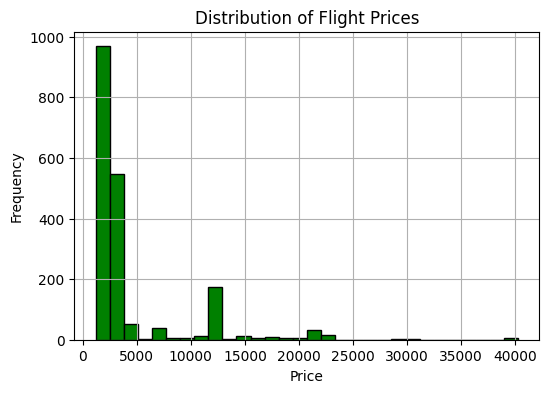

In [4]:
# Distribution of target class
plt.figure(figsize=(6, 4))
plt.hist(df['Price'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [5]:
# final dataset preview
df.head()


,Price,Duration_Minutes,"Airline_Air Europa, Aeroflot",Airline_Air France,"Airline_Air France, Aeroflot","Airline_Air France, KLM","Airline_Air France, airBaltic",Airline_Air Serbia,"Airline_Air Serbia, Aeroflot","Airline_Alaska Airlines, Aeroflot",...,"Airline_Turkish Airlines, Aeroflot","Airline_United Airlines, Aeroflot","Airline_United Airlines, Air France","Airline_United Airlines, Brussels Airlines","Airline_United Airlines, Finnair","Airline_United Airlines, LOT","Airline_United Airlines, airBaltic","Airline_Virgin Atlantic, KLM","Airline_Vueling, Aeroflot","Airline_Vueling, KLM"
0,1282.0,540,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1203.0,540,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1203.0,540,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1397.0,690,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1414.0,755,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Training the ExtraTreesRegressor model with RandomizedSearchCV
etr = ExtraTreesRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=etr, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# Getting the best estimator from the search
best_etr = random_search.best_estimator_
# Predicting on the test set
y_pred = best_etr.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)
